In [1]:
import pandas as pd

In [2]:
indir = '/home/llr/cms/motta/HGCAL/CMSSW_11_1_0/src/GRAPHAnalysis/L1BDT/hdf5dataframes/calibrated_C1skimC2C3'

name = 'threshold'
    
# define the input and output dictionaries for the handling of different datasets
inFileTraining_dict = {
    'threshold'    : indir+'/Training_PU200_th_calibrated.hdf5',
    'mixed'        : indir+'/'
}
inFileValidation_dict = {
    'threshold'    : indir+'/Validation_PU200_th_calibrated.hdf5',
    'mixed'        : indir+'/'
}

store_tr = pd.HDFStore(inFileTraining_dict[name], mode='r')
dfTr = store_tr[name]
store_tr.close()

store_tr = pd.HDFStore(inFileValidation_dict[name], mode='r')
dfVal = store_tr[name]
store_tr.close()

df = pd.concat([dfTr, dfVal], sort=False)
del dfTr, dfVal

In [3]:
dfTau = df.query('sgnId==1')

In [4]:
dfPU = df.query('geom_match==False')

In [5]:
tot = dfTau.shape[0]
neg = dfTau.query('cl3d_pt-cl3d_c1<=0.0').shape[0]

In [6]:
print(tot)
print(neg)

98203
25896


In [7]:
tot = dfPU.shape[0]
neg = dfPU.query('cl3d_pt-cl3d_c1<=0.0').shape[0]

In [8]:
print(tot)
print(neg)

14660118
13124020


In [9]:
negTau = dfTau.query('cl3d_pt-cl3d_c1<=0.0').copy(deep=True)
negPU  = dfPU.query('cl3d_pt-cl3d_c1<=0.0').copy(deep=True)

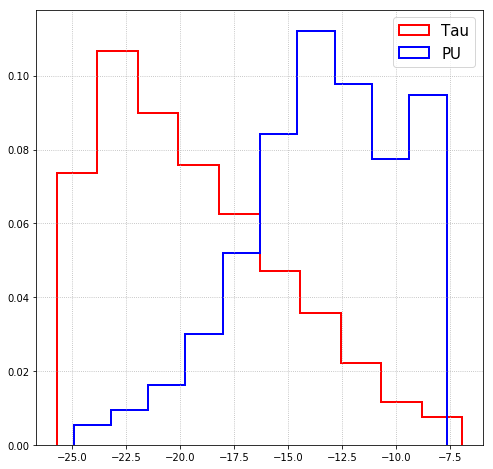

In [11]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,8))
plt.hist(negTau['cl3d_pt']-negTau['cl3d_pt_c1'],  label='Tau', color='red', histtype='step', lw=2, density=True)
plt.hist(negPU['cl3d_pt']-negPU['cl3d_pt_c1'],  label='PU', color='blue', histtype='step', lw=2, density=True)
plt.legend(loc = 'upper right', fontsize=15)
plt.grid(linestyle=':')
#plt.show()

In [14]:
tmpTau = negTau.sample(2000)
tmpPU = negPU.sample(2000)

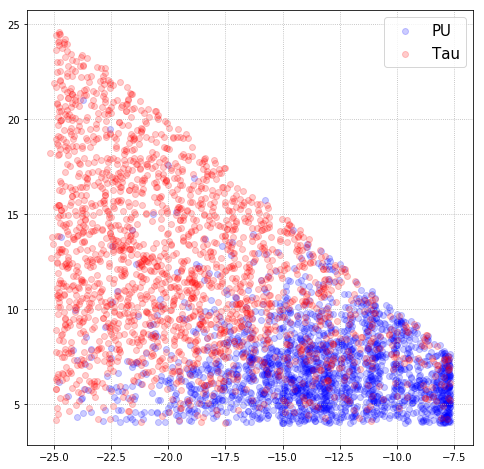

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(tmpPU['cl3d_pt']-tmpPU['cl3d_pt_c1'], tmpPU['cl3d_pt'],  label='PU', color='blue', alpha=0.2)
plt.scatter(tmpTau['cl3d_pt']-tmpTau['cl3d_pt_c1'], tmpTau['cl3d_pt'],  label='Tau', color='red', alpha=0.2)
plt.legend(loc = 'upper right', fontsize=15)
plt.grid(linestyle=':')
plt.show()

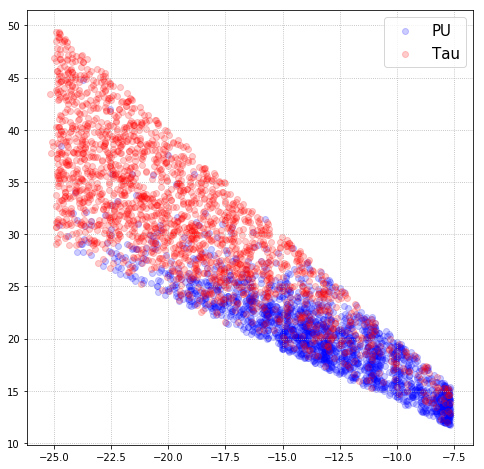

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(tmpPU['cl3d_pt']-tmpPU['cl3d_pt_c1'], tmpPU['cl3d_pt_c1'],  label='PU', color='blue', alpha=0.2)
plt.scatter(tmpTau['cl3d_pt']-tmpTau['cl3d_pt_c1'], tmpTau['cl3d_pt_c1'],  label='Tau', color='red', alpha=0.2)
plt.legend(loc = 'upper right', fontsize=15)
plt.grid(linestyle=':')
plt.show()

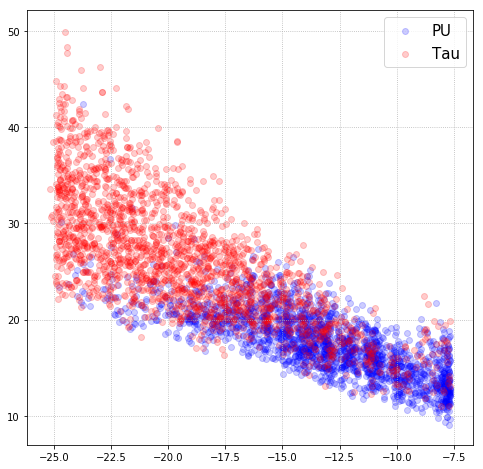

In [19]:
plt.figure(figsize=(8,8))
plt.scatter(tmpPU['cl3d_pt']-tmpPU['cl3d_pt_c1'], tmpPU['cl3d_pt_c2'],  label='PU', color='blue', alpha=0.2)
plt.scatter(tmpTau['cl3d_pt']-tmpTau['cl3d_pt_c1'], tmpTau['cl3d_pt_c2'],  label='Tau', color='red', alpha=0.2)
plt.legend(loc = 'upper right', fontsize=15)
plt.grid(linestyle=':')
plt.show()

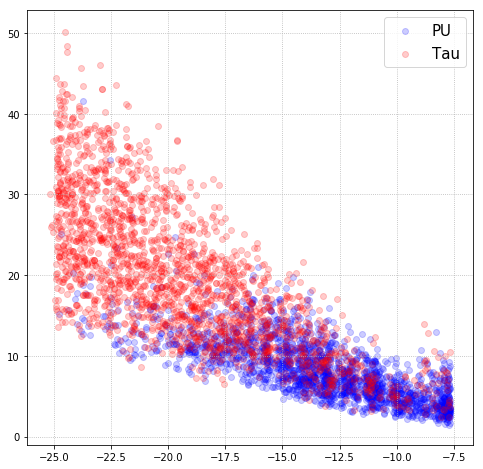

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(tmpPU['cl3d_pt']-tmpPU['cl3d_pt_c1'], tmpPU['cl3d_pt_c3'],  label='PU', color='blue', alpha=0.2)
plt.scatter(tmpTau['cl3d_pt']-tmpTau['cl3d_pt_c1'], tmpTau['cl3d_pt_c3'],  label='Tau', color='red', alpha=0.2)
plt.legend(loc = 'upper right', fontsize=15)
plt.grid(linestyle=':')
plt.show()

In [28]:
import numpy as np

2.0 / (1.0 + np.exp(-2.0 * -100)) - 1

-1.0